In [9]:
import pandas as pd
import numpy as np

import time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.python.client import device_lib

### Device

In [10]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2450550256206215995
]


### Get data

In [11]:
FILEPATH = 'data/data.csv'
df = pd.read_csv(FILEPATH, header=None)
df.head()

input_data = np.array(df)

### Model Generation

In [12]:
models = []
for depth in range(0,32):
    model = Sequential()
    model.add(Dense(units=352, input_dim = 352))
    for i in range(depth):
        model.add(Dense(units=352))
    model.add(Dense(units=1))
    
    models.append(model)

### Calculate Inference Time

In [13]:
inference_times = []
inference_avg_times = []
for model in models:
    start = time.time()
    x  = model.predict(input_data)
    inference_time = (time.time()-start)
    inference_avg_time = inference_time / len(input_data)
    inference_times.append(inference_time)
    inference_avg_times.append(inference_avg_time)

In [14]:
INFERENCE_FIGUREPATH = "figure/inference_32_1.png"
INFERENCE_AVG_FIGUREPATH = "figure/inference_32_1_avg.png"

### Save figure

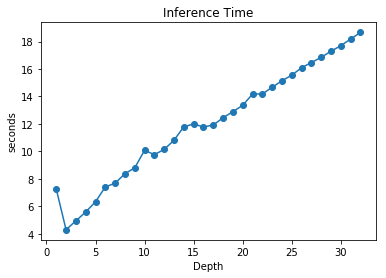

In [15]:
plt.title("Inference Time")
plt.xlabel("Depth")
plt.ylabel("seconds")
plt.scatter([i for i in range(1,33)],inference_times)
plt.plot([i for i in range(1,33)],inference_times)
# plt.hist(inference_times)
plt.savefig(FIGUREPATH)
plt.show()

[7.255731105804444e-05, 4.2934949398040774e-05, 4.941014051437378e-05, 5.5812509059906005e-05, 6.332908868789672e-05, 7.410921096801758e-05, 7.685510158538818e-05, 8.371585845947265e-05, 8.804360151290894e-05, 0.00010078330039978027, 9.760825157165528e-05, 0.00010143338918685913, 0.00010810318946838379, 0.00011792175054550171, 0.00011993355989456176, 0.00011779715061187745, 0.00011917346000671386, 0.0001245250391960144, 0.00012891569137573242, 0.00013353869915008545, 0.00014173640966415405, 0.00014185667037963867, 0.0001466131281852722, 0.00015143526077270508, 0.0001554991102218628, 0.00016092809915542602, 0.00016471637010574342, 0.0001684792709350586, 0.00017297977924346923, 0.00017697803020477295, 0.00018181619167327882, 0.00018663817882537843]


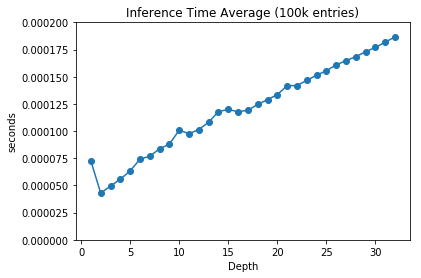

In [23]:
print(inference_avg_times)
plt.title("Inference Time Average (100k entries)")
plt.xlabel("Depth")
plt.ylabel("seconds")
plt.ylim(0,0.0002)
plt.scatter([i for i in range(1,33)],inference_avg_times)
plt.plot([i for i in range(1,33)],inference_avg_times)
# plt.hist(inference_times)
plt.savefig(FIGUREPATH)
plt.show()